<a href="https://colab.research.google.com/github/Shankar-Hadimani/ai-ml-engineering/blob/master/notebook/tf_sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!nvidia-smi

Fri Nov 13 15:22:09 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 455.32.00    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   64C    P8    12W /  70W |      0MiB / 15079MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [3]:
from __future__ import  absolute_import, division, print_function, unicode_literals
try:
  !pip uninstall  tb-nightly tensorboardX tensorboard
  !pip install tb-nightly
except Exception:
  pass

Uninstalling tb-nightly-2.5.0a20201113:
  Would remove:
    /usr/local/bin/tensorboard
    /usr/local/lib/python3.6/dist-packages/tb_nightly-2.5.0a20201113.dist-info/*
    /usr/local/lib/python3.6/dist-packages/tensorboard/*
  Would not remove (might be manually added):
    /usr/local/lib/python3.6/dist-packages/tensorboard/plugins/beholder/__init__.py
    /usr/local/lib/python3.6/dist-packages/tensorboard/plugins/beholder/beholder.py
    /usr/local/lib/python3.6/dist-packages/tensorboard/plugins/beholder/beholder_plugin.py
    /usr/local/lib/python3.6/dist-packages/tensorboard/plugins/beholder/beholder_plugin_loader.py
    /usr/local/lib/python3.6/dist-packages/tensorboard/plugins/beholder/colormaps.py
    /usr/local/lib/python3.6/dist-packages/tensorboard/plugins/beholder/file_system_tools.py
    /usr/local/lib/python3.6/dist-packages/tensorboard/plugins/beholder/im_util.py
    /usr/local/lib/python3.6/dist-packages/tensorboard/plugins/beholder/resources/arrays-missing.png
    /usr/l

In [24]:
import tensorflow as tf
import os
import datetime
import tensorflow_datasets as tfds

%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [6]:
import pkg_resources
for entry_point in pkg_resources.iter_entry_points('tensorboard_plugins'):
  print(entry_point.dist)


tensorboard 2.3.0
tensorboard-plugin-wit 1.7.0


In [7]:
print(tf.__version__)

2.3.0


In [8]:
!ls -alrt /usr/local/lib/python3.6/dist-packages/tensorboard*

/usr/local/lib/python3.6/dist-packages/tensorboard_plugin_wit-1.7.0.dist-info:
total 44
-rw-r--r-- 1 root staff   92 Nov  6 17:35 WHEEL
-rw-r--r-- 1 root staff   23 Nov  6 17:35 top_level.txt
-rw-r--r-- 1 root staff  214 Nov  6 17:35 METADATA
-rw-r--r-- 1 root staff   93 Nov  6 17:35 entry_points.txt
-rw-r--r-- 1 root staff 8386 Nov  6 17:39 RECORD
-rw-r--r-- 1 root staff    4 Nov  6 17:39 INSTALLER
drwxr-sr-x 2 root staff 4096 Nov  6 17:39 .
drwxrwsr-x 1 root staff 4096 Nov 13 15:23 ..

/usr/local/lib/python3.6/dist-packages/tensorboard_plugin_wit:
total 52
-rw-r--r-- 1 root staff 19137 Nov  6 17:35 wit_plugin.py
-rw-r--r-- 1 root staff  2934 Nov  6 17:35 wit_plugin_loader.py
-rw-r--r-- 1 root staff     0 Nov  6 17:35 __init__.py
drwxr-sr-x 4 root staff  4096 Nov  6 17:39 _vendor
drwxr-sr-x 3 root staff  4096 Nov  6 17:39 _utils
drwxr-sr-x 2 root staff  4096 Nov  6 17:39 static
drwxr-sr-x 2 root staff  4096 Nov  6 17:39 __pycache__
drwxr-sr-x 6 root staff  4096 Nov  6 17:39 .
drwxrwsr

In [9]:
!rm -r /usr/local/lib/python3.6/dist-packages/tensorboardcolab-0.0.22.dist-info

In [10]:
print(tf.__version__)

2.3.0


In [11]:
tf.config.experimental.list_logical_devices()

[LogicalDevice(name='/device:CPU:0', device_type='CPU'),
 LogicalDevice(name='/device:XLA_CPU:0', device_type='XLA_CPU'),
 LogicalDevice(name='/device:XLA_GPU:0', device_type='XLA_GPU'),
 LogicalDevice(name='/device:GPU:0', device_type='GPU')]

In [12]:
dataset, info = tfds.load('amazon_us_reviews/Mobile_Electronics_v1_00', with_info=True)
train_dataset = dataset['train']

Shuffling and writing examples to /root/tensorflow_datasets/amazon_us_reviews/Mobile_Electronics_v1_00/0.1.0.incompleteUULWE3/amazon_us_reviews-train.tfrecord


Dataset amazon_us_reviews downloaded and prepared to /root/tensorflow_datasets/amazon_us_reviews/Mobile_Electronics_v1_00/0.1.0. Subsequent calls will reuse this data.


In [14]:
info

tfds.core.DatasetInfo(
    name='amazon_us_reviews',
    version=0.1.0,
    description='Amazon Customer Reviews (a.k.a. Product Reviews) is one of Amazons iconic products. In a period of over two decades since the first review in 1995, millions of Amazon customers have contributed over a hundred million reviews to express opinions and describe their experiences regarding products on the Amazon.com website. This makes Amazon Customer Reviews a rich source of information for academic researchers in the fields of Natural Language Processing (NLP), Information Retrieval (IR), and Machine Learning (ML), amongst others. Accordingly, we are releasing this data to further research in multiple disciplines related to understanding customer product experiences. Specifically, this dataset was constructed to represent a sample of customer evaluations and opinions, variation in the perception of a product across geographical regions, and promotional intent or bias in reviews.

Over 130+ million cus

In [15]:
print(train_dataset)

<PrefetchDataset shapes: {data: {customer_id: (), helpful_votes: (), marketplace: (), product_category: (), product_id: (), product_parent: (), product_title: (), review_body: (), review_date: (), review_headline: (), review_id: (), star_rating: (), total_votes: (), verified_purchase: (), vine: ()}}, types: {data: {customer_id: tf.string, helpful_votes: tf.int32, marketplace: tf.string, product_category: tf.string, product_id: tf.string, product_parent: tf.string, product_title: tf.string, review_body: tf.string, review_date: tf.string, review_headline: tf.string, review_id: tf.string, star_rating: tf.int32, total_votes: tf.int32, verified_purchase: tf.int64, vine: tf.int64}}>


In [18]:
len(list(train_dataset))

104975

In [19]:
BUFFER_SIZE = 30000
BATCH_SIZE = 128

In [20]:
train_dataset = train_dataset.shuffle(BUFFER_SIZE, reshuffle_each_iteration=False)

In [21]:
# print the each record, each features is an tensor object unlike pandas dataframe.
# so to view sample  data, iterate over picked records
for reviews in train_dataset.take(2):  
  print(reviews)   


{'data': {'customer_id': <tf.Tensor: shape=(), dtype=string, numpy=b'42942316'>, 'helpful_votes': <tf.Tensor: shape=(), dtype=int32, numpy=0>, 'marketplace': <tf.Tensor: shape=(), dtype=string, numpy=b'US'>, 'product_category': <tf.Tensor: shape=(), dtype=string, numpy=b'Mobile_Electronics'>, 'product_id': <tf.Tensor: shape=(), dtype=string, numpy=b'B00QX3OMVQ'>, 'product_parent': <tf.Tensor: shape=(), dtype=string, numpy=b'538890715'>, 'product_title': <tf.Tensor: shape=(), dtype=string, numpy=b'ReplacementRemote Control For Pioneer AVH-P4000 AVH-P4000DVD AVH-P4100DVD AVH-P4200DVD DVD CD Car Stereo AV Receiver System'>, 'review_body': <tf.Tensor: shape=(), dtype=string, numpy=b'Remote works great.... seller is very helpful....and I like fast resonse..... I would definitely order  again....I have also recommended this company to a friend..'>, 'review_date': <tf.Tensor: shape=(), dtype=string, numpy=b'2015-06-21'>, 'review_headline': <tf.Tensor: shape=(), dtype=string, numpy=b'Very impr

In [22]:
# view selective features from 10 records from tensor dataset.
for reviews in train_dataset.take(10):
  review_text = reviews['data']
  print(review_text.get('review_body').numpy())
  print(review_text.get('star_rating'))
  print(tf.where(review_text.get('star_rating')>3,1,0).numpy())

b'Remote works great.... seller is very helpful....and I like fast resonse..... I would definitely order  again....I have also recommended this company to a friend..'
tf.Tensor(5, shape=(), dtype=int32)
1
b'dont do it not blutooth  i ordered 2  one only 1 ear work  they are  craap'
tf.Tensor(1, shape=(), dtype=int32)
0
b'i had a bit difficulty to make it work, the instruction was not so clear and i am no familiar with those things., But when i did make it work it was ok, it is smal so very portable'
tf.Tensor(4, shape=(), dtype=int32)
1
b'i love this skin case for its sleek and trendy design.  its good for protection from scratches, but not as a shock absorber for any falls.'
tf.Tensor(4, shape=(), dtype=int32)
1
b'For my grandson and he really likes it...  He and his little brother wanted covers for their iPods and this is what he chose'
tf.Tensor(5, shape=(), dtype=int32)
1
b"This screen protector makes my iPod look like a mirror and is super easy to put on. The protector is rigid wh

In [29]:
#begin pre-process the data/feature engineer
#tokenize the text body
#tokenizer = tfds.features.text.Tokenizer() ### deprecated
tokenizer = tfds.deprecated.text.Tokenizer()



#create an sempty set, to hold only unique words
vocabulary_set = set()

### tokenize the text body
for _, reviews in train_dataset.enumerate():
  review_text=reviews['data']
  reviews_tokens = tokenizer.tokenize(review_text.get('review_body').numpy())
  vocabulary_set.update(reviews_tokens)

### get the length of the set 
vocab_size = len(vocabulary_set)
vocab_size

73738

In [32]:
#encode each of vocabulary words from set, with numeric values
##encoder = tfds.features.text.TokenTextEncoder(vocabulary_set) ### deprecated this method
encoder = tfds.deprecated.text.TokenTextEncoder(vocabulary_set)

In [33]:
### view the 5 rows of encoded values(,for visibility)
for reviews in train_dataset.take(5):
  review_text = reviews['data']
  print(review_text.get('review_body').numpy())
  encoded_example = encoder.encode(review_text.get('review_body').numpy())
  print(encoded_example)


b'Remote works great.... seller is very helpful....and I like fast resonse..... I would definitely order  again....I have also recommended this company to a friend..'
[15492, 48495, 58024, 44286, 11045, 53329, 43570, 70066, 45797, 51063, 64262, 45485, 45797, 41859, 31594, 57595, 39198, 45797, 42160, 63314, 12277, 7096, 11894, 21634, 2974, 35537]
b'dont do it not blutooth  i ordered 2  one only 1 ear work  they are  craap'
[37658, 10812, 20615, 14501, 35117, 34096, 18083, 26938, 60036, 43333, 31331, 62361, 170, 2074, 32234, 41245]
b'i had a bit difficulty to make it work, the instruction was not so clear and i am no familiar with those things., But when i did make it work it was ok, it is smal so very portable'
[34096, 51400, 2974, 60525, 35943, 21634, 19136, 20615, 170, 20850, 21083, 65420, 14501, 32862, 43466, 70066, 34096, 17964, 56064, 9267, 60684, 40777, 30912, 40441, 23885, 34096, 23748, 19136, 20615, 170, 20615, 65420, 51832, 20615, 11045, 61326, 32862, 53329, 40498]
b'i love thi

In [34]:
## to visualise better,
for i in encoded_example:
  print('{} ----- >{} '.format(i, encoder.decode([i])))

33191 ----- >For 
70474 ----- >my 
1314 ----- >grandson 
70066 ----- >and 
42984 ----- >he 
49916 ----- >really 
21151 ----- >likes 
20615 ----- >it 
18875 ----- >He 
70066 ----- >and 
39283 ----- >his 
63405 ----- >little 
48667 ----- >brother 
8056 ----- >wanted 
19643 ----- >covers 
20398 ----- >for 
59963 ----- >their 
64567 ----- >iPods 
70066 ----- >and 
7096 ----- >this 
11045 ----- >is 
54519 ----- >what 
42984 ----- >he 
34018 ----- >chose 


In [35]:
### func to encode the text body
def encode_text(text_tensor, label_tensor):
  encoded_text = encoder.encode(text_tensor.numpy())
  label = tf.where(label_tensor>3, 1,0)
  return encoded_text, label


### wrapper func to extract text body and review from dataset
def extract_encode_text(tensor_data):
  text = tensor_data['data'].get('review_body')
  rating = tensor_data['data'].get('star_rating')

  encoded_text, label = tf.py_function(encode_text, 
                                       inp=[text, rating],
                                       Tout=(tf.int64, tf.int32)
                                       )
  encoded_text.set_shape([None])   ## not necessary step. shaping happens on it's own
  label.set_shape([])              ## not necessary step. shaping happens on it's own
  return encoded_text, label


In [37]:
### appy function on true dataset
arr_encoded_data = train_dataset.map(extract_encode_text)

In [38]:
for i, j in arr_encoded_data.take(2):
  print('encoded text value are: {}, and label is: {}'.format(i, j)) 

encoded text value are: [15492 48495 58024 44286 11045 53329 43570 70066 45797 51063 64262 45485
 45797 41859 31594 57595 39198 45797 42160 63314 12277  7096 11894 21634
  2974 35537], and label is: 1
encoded text value are: [37658 10812 20615 14501 35117 34096 18083 26938 60036 43333 31331 62361
   170  2074 32234 41245], and label is: 0


In [40]:
### for this use case: get the take_size as the test data and remaining as train data
### randomly shuffle the train data
### pad the batches to align varying lenghts. each reviews has variable length, defaulting each review to same length in numeic encoders

TAKE_SIZE = 10000  ### taking test dataset as 10K rows
train_data = arr_encoded_data.skip(TAKE_SIZE).shuffle(BUFFER_SIZE)
train_data = train_data.padded_batch(BATCH_SIZE)  ### pad with zeros

test_data = arr_encoded_data.take(TAKE_SIZE)
test_data = test_data.padded_batch(BATCH_SIZE)


In [42]:
### add one more feature as zero
vocab_size +=1

### view the first record distribution
sample_text, sample_label = next(iter(test_data))
sample_text[0], sample_label[0]

(<tf.Tensor: shape=(588,), dtype=int64, numpy=
 array([15492, 48495, 58024, 44286, 11045, 53329, 43570, 70066, 45797,
        51063, 64262, 45485, 45797, 41859, 31594, 57595, 39198, 45797,
        42160, 63314, 12277,  7096, 11894, 21634,  2974, 35537,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,  

In [56]:
for i, j in test_data.take(10):
  print(tf.unique_with_counts(j)[2].numpy())

[90 38]
[87 41]
[37 91]
[87 41]
[45 83]
[90 38]
[93 35]
[41 87]
[78 50]
[82 46]


In [57]:
print(vocab_size)

73740


In [51]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Embedding(vocab_size, 128))
model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128,return_sequences=True)))
model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)))

for val in [64,64]:
  model.add(tf.keras.layers.Dense(units=val, activation='relu'))

### it's takes linear activation. in image processing you use 'sigmoid'
### usually with sigmoid function output will be 0 and 1, which we don't want here.
### try with activation function iwth 'relu' for last dense layer (Dense(1)).. in below.
model.add(tf.keras.layers.Dense(1)) 


In [58]:
!rm -r /tmp/logs

rm: cannot remove '/tmp/logs': No such file or directory


In [60]:
### write the model logs onto logs directory.
logdir = os.path.join("/tmp/logs", datetime.datetime.now().strftime('%Y%m%d-%H%M%S'))

###TensorBoard is a visualization tool provided with TensorFlow.
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir, histogram_freq=1)

### add a checkpoint to collect best possible model and save it from that particlaur epoch.
###eahc epoch returns different model output
checkpointer = tf.keras.callbacks.ModelCheckpoint(filepath='/tmp/sentiment_analysis.hdf5', verbose=1,save_best_only=True)


### compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])


In [61]:
### for this , am using validation dataset as  that of test dataset
### ideally i should have had 3 datastes for train, test and validation
###using tensor callbackfo rlogging and check pointing the best model.
history=model.fit(x=train_data, epochs=4, validation_data=test_data, callbacks=[tensorboard_callback, checkpointer])

Epoch 1/4
  1/742 [..............................] - ETA: 0s - loss: 0.6955 - accuracy: 0.3203WARNING:tensorflow:From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/summary_ops_v2.py:1277: stop (from tensorflow.python.eager.profiler) is deprecated and will be removed after 2020-07-01.
Instructions for updating:
use `tf.profiler.experimental.stop` instead.


Instructions for updating:
use `tf.profiler.experimental.stop` instead.


742/742 [==============================] - ETA: 0s - loss: 0.3363 - accuracy: 0.8478
Epoch 00001: val_loss improved from inf to 0.28063, saving model to /tmp/sentiment_analysis.hdf5
742/742 [==============================] - 278s 375ms/step - loss: 0.3363 - accuracy: 0.8478 - val_loss: 0.2806 - val_accuracy: 0.8791
Epoch 2/4
742/742 [==============================] - ETA: 0s - loss: 0.2193 - accuracy: 0.9106
Epoch 00002: val_loss improved from 0.28063 to 0.26769, saving model to /tmp/sentiment_analysis.hdf5
742/742 [==============================] - 277s 373ms/step - loss: 0.2193 - accuracy: 0.9106 - val_loss: 0.2677 - val_accuracy: 0.8878
Epoch 3/4
742/742 [==============================] - ETA: 0s - loss: 0.1649 - accuracy: 0.9349
Epoch 00003: val_loss did not improve from 0.26769
742/742 [==============================] - 276s 373ms/step - loss: 0.1649 - accuracy: 0.9349 - val_loss: 0.2817 - val_accuracy: 0.8907
Epoch 4/4
742/742 [==============================] - ETA: 0s - loss: 0.

In [62]:
model.save('/tmp/final_sentiment_analysis.hdf5')

In [63]:
!ls -altr /tmp/*.hdf5

-rw-r--r-- 1 root root 118634568 Nov 13 17:14 /tmp/sentiment_analysis.hdf5
-rw-r--r-- 1 root root 118634568 Nov 13 17:25 /tmp/final_sentiment_analysis.hdf5


In [64]:
### evaluate the model with test data on final model.
eval_loss, eval_acc = model.evaluate(test_data)

79/79 [==============================] - 15s 190ms/step - loss: 0.3199 - accuracy: 0.8825


In [66]:
print('\n Evaluation loss: {:.3f}, Evaluation accuracy: {:.3f}'.format(eval_loss, eval_acc))


 Evaluation loss: 0.320, Evaluation accuracy: 0.882


In [67]:
### view the sentiment values.. 
## 0 --negative  and 1 -- positive numbers

for f0, f1 in test_data.take(1):
  print(f1)
  print(model.predict(f0))

tf.Tensor(
[1 0 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 0 1 1 1 0 0
 0 1 1 0 1 0 1 1 1 1 1 1 0 0 1 1 0 1 0 0 1 1 1 0 0 0 0 1 1 1 1 0 0 1 1 1 1
 1 1 1 1 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 0 0 0 0 1 0
 1 0 1 1 0 1 1 1 0 1 0 1 1 1 1 0 1], shape=(128,), dtype=int32)
[[ 6.584061  ]
 [-3.1459596 ]
 [-1.07247   ]
 [ 3.8737667 ]
 [ 5.785824  ]
 [ 6.1166897 ]
 [-6.202849  ]
 [ 6.0163255 ]
 [ 4.122931  ]
 [ 5.3300533 ]
 [ 4.6992435 ]
 [ 4.047249  ]
 [ 5.123311  ]
 [ 6.561298  ]
 [-5.3067746 ]
 [ 5.136565  ]
 [ 6.531487  ]
 [ 3.7889674 ]
 [ 6.3481035 ]
 [ 4.9139795 ]
 [ 0.13407102]
 [-7.563557  ]
 [ 5.329128  ]
 [ 7.3511457 ]
 [ 6.1125345 ]
 [-4.3073254 ]
 [ 4.9855366 ]
 [-4.1791816 ]
 [ 1.5881786 ]
 [ 5.201629  ]
 [ 4.5972285 ]
 [ 3.380331  ]
 [ 5.880027  ]
 [ 5.7164264 ]
 [ 6.258999  ]
 [ 3.0767343 ]
 [-6.461754  ]
 [-6.0363383 ]
 [ 1.599313  ]
 [ 5.142624  ]
 [-3.6267946 ]
 [ 5.158632  ]
 [-0.28229257]
 [ 6.6634803 ]
 [ 5.90251   ]
 [-3.6404152 ]
 [-1.61395

In [68]:
### view the number of layers we applied.
model.layers

In [69]:
### check the sumaryr details for number of paraenters for eahc layer
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 128)         9438720   
_________________________________________________________________
bidirectional_2 (Bidirection (None, None, 256)         263168    
_________________________________________________________________
bidirectional_3 (Bidirection (None, 128)               164352    
_________________________________________________________________
dense_3 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_4 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 65        
Total params: 9,878,721
Trainable params: 9,878,721
Non-trainable params: 0
____________________________________________

In [70]:
!nvidia-smi

Fri Nov 13 17:40:49 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 455.32.00    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   77C    P0    37W /  70W |   8841MiB / 15079MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [71]:
import matplotlib.pyplot as plt

def plot_graphs(history, metric):
  plt.plot(history.history[metric])
  plt.plot(history.history['val_'+ metric],'')
  plt.xlabel("Epochs")
  plt.ylabel(metric)
  plt.legend([metric, 'val_'+metric])
  plt.show()


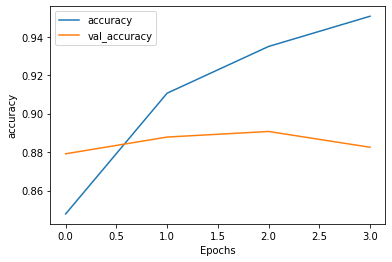

In [72]:
plot_graphs(history, 'accuracy')

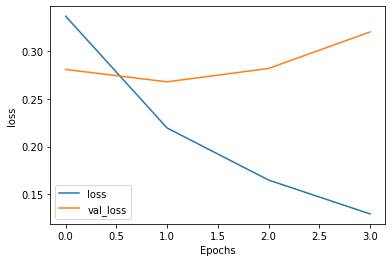

In [73]:
plot_graphs(history, 'loss')

In [76]:
### clear all the sessions in the background
tf.keras.backend.clear_session()

### load the bets saved model, not the final model copy
sent_analytics_load = tf.keras.models.load_model('/tmp/sentiment_analysis.hdf5', compile=False)

In [77]:
### before depoying the model, batch sized paddign can be overidden with individual row level padding
### decide on a constant padding length size and use it. it can be maxium lenght from the datasets or pad it for lesser length
## as model has seen variable length
def pad_to_size(vec, size):
  print(vec)
  zeros = [0] * (size - len(vec))
  vec.extend(zeros)
  return vec


In [78]:
### create a predict fundtion on the model
### use 32 as the ocnstant size, at the moment

def predict_func(pred_text):
  encoded_text = encoder.encode(pred_text)
  print(encoded_text)
  padded_encoded_text = pad_to_size(encoded_text, 32)
  print(padded_encoded_text)
  cast_padded_encoded_text = tf.cast(padded_encoded_text, tf.float32)
  predict_output = sent_analytics_load.predict(tf.expand_dims(cast_padded_encoded_text,0))

  return (predict_output)


In [79]:
### test with some values.....
text = ("This is watch pretty bad. Color and dials looks pathetic")
print(text)
predictions = predict_func(text)
print(predictions)

This is watch pretty bad. Color and dials looks pathetic
[48347, 11045, 6209, 49439, 19027, 10192, 70066, 73574, 54836, 23600]
[48347, 11045, 6209, 49439, 19027, 10192, 70066, 73574, 54836, 23600]
[48347, 11045, 6209, 49439, 19027, 10192, 70066, 73574, 54836, 23600, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[[-2.481081]]


In [80]:
### test with some values.....
text = ("Product amazing. Fast delivery & nice packing")
print(text)
predictions = predict_func(text)
print(predictions)

Product amazing. Fast delivery & nice packing
[54412, 71208, 54135, 27992, 34857, 19667]
[54412, 71208, 54135, 27992, 34857, 19667]
[54412, 71208, 54135, 27992, 34857, 19667, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[[5.0296154]]


In [81]:
### test with some values.....
text = ("Nice product. Packing could have been better")
print(text)
predictions = predict_func(text)
print(predictions)

Nice product. Packing could have been better
[29165, 66445, 67676, 61526, 42160, 46947, 68390]
[29165, 66445, 67676, 61526, 42160, 46947, 68390]
[29165, 66445, 67676, 61526, 42160, 46947, 68390, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[[2.8844445]]


In [82]:
### test with some values.....
text = ("This is watch pretty bad. Color and dials looks pathetic")
print(text)
predictions = predict_func(text)
print(predictions)

This is watch pretty bad. Color and dials looks pathetic
[48347, 11045, 6209, 49439, 19027, 10192, 70066, 73574, 54836, 23600]
[48347, 11045, 6209, 49439, 19027, 10192, 70066, 73574, 54836, 23600]
[48347, 11045, 6209, 49439, 19027, 10192, 70066, 73574, 54836, 23600, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[[-2.481081]]


In [83]:
### test with some values.....
text = ("Color an ddia does not look as advertised. Shiipoing was not any better either")
print(text)
predictions = predict_func(text)
print(predictions)

Color an ddia does not look as advertised. Shiipoing was not any better either
[10192, 1716, 73739, 3330, 14501, 12217, 28885, 12920, 73739, 65420, 14501, 22668, 68390, 43713]
[10192, 1716, 73739, 3330, 14501, 12217, 28885, 12920, 73739, 65420, 14501, 22668, 68390, 43713]
[10192, 1716, 73739, 3330, 14501, 12217, 28885, 12920, 73739, 65420, 14501, 22668, 68390, 43713, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[[-2.560629]]


In [84]:
### check the distrinbution startegy of tesnor flow
print(tf.distribute.get_strategy)

<function get_strategy at 0x7f84fadd77b8>


In [88]:
%reload_ext tensorboard

In [89]:
%tensorboard --logdir /tmp/logs

ERROR: Failed to launch TensorBoard (exited with 1).
Contents of stderr:
2020-11-13 18:20:28.048096: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
Traceback (most recent call last):
  File "/usr/local/bin/tensorboard", line 8, in <module>
    sys.exit(run_main())
  File "/usr/local/lib/python3.6/dist-packages/tensorboard/main.py", line 75, in run_main
    app.run(tensorboard.main, flags_parser=tensorboard.configure)
  File "/usr/local/lib/python3.6/dist-packages/absl/app.py", line 300, in run
    _run_main(main, args)
  File "/usr/local/lib/python3.6/dist-packages/absl/app.py", line 251, in _run_main
    sys.exit(main(argv))
  File "/usr/local/lib/python3.6/dist-packages/tensorboard/program.py", line 289, in main
    return runner(self.flags) or 0
  File "/usr/local/lib/python3.6/dist-packages/tensorboard/program.py", line 305, in _run_serve_subcommand
    server = self._make_server()
  File "/usr/local/lib/python3